In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("PythonDatasets/MyMLDataSets/Classified Data.csv")

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
X = df[df.columns[:-1]]

In [7]:
X.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [8]:
y = df['TARGET CLASS']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled = scaler.transform(X_train)

In [15]:
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [20]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [21]:
X_train_scaled_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,1.753152,-1.529044,0.201155,0.404544,-0.594814,-0.620951,0.802201,-0.920389,1.678681,-0.190895
1,-0.272470,1.872804,0.377606,-0.820591,0.102246,-0.388050,0.479974,0.885684,0.098745,0.325296
2,-1.112423,0.437979,0.016759,-0.898251,-1.206380,0.193981,-0.801242,-1.132166,0.856039,0.102688
3,0.257782,-1.068292,-0.681923,0.805679,-2.373434,-1.522916,-0.705859,0.797506,0.209251,0.221870
4,-0.140464,0.196665,-0.948266,0.352935,-1.087502,-2.341396,-0.764701,-1.496120,-0.955784,-0.650900


In [22]:
#PART2


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
my_error_rate = []

In [25]:
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled_df, y_train)
    predictions_i = knn.predict(X_test_scaled_df)
    my_error_rate.append(np.mean(predictions_i != y_test))

Text(0, 0.5, 'Error Rate')

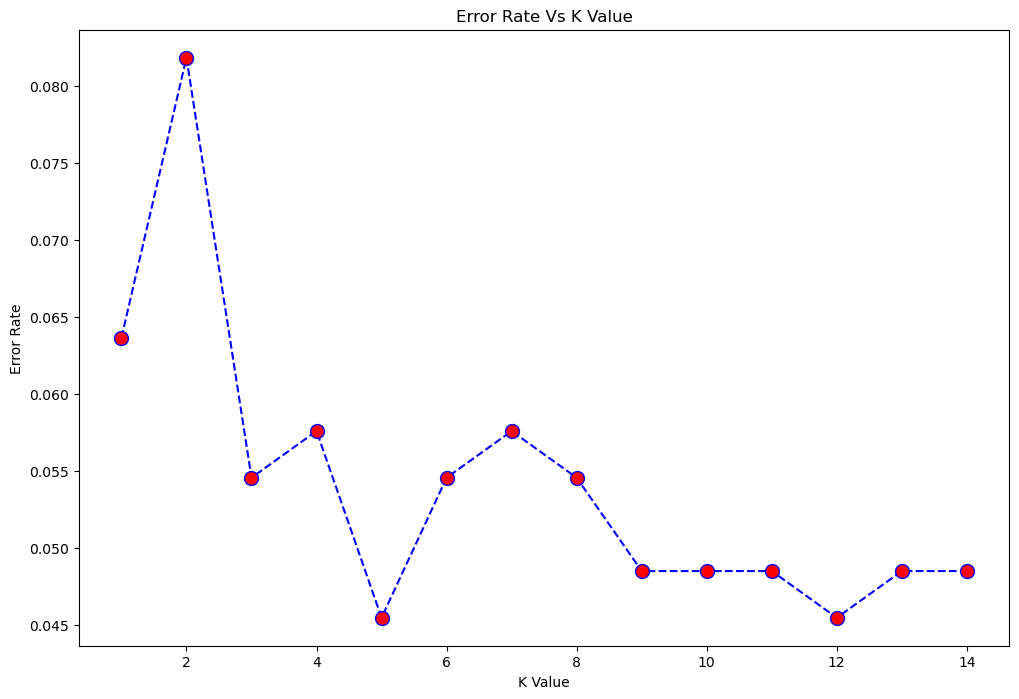

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 15), my_error_rate, color='blue', linestyle= 'dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

C:\Users\VISHNU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VISHNU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Error Rate')

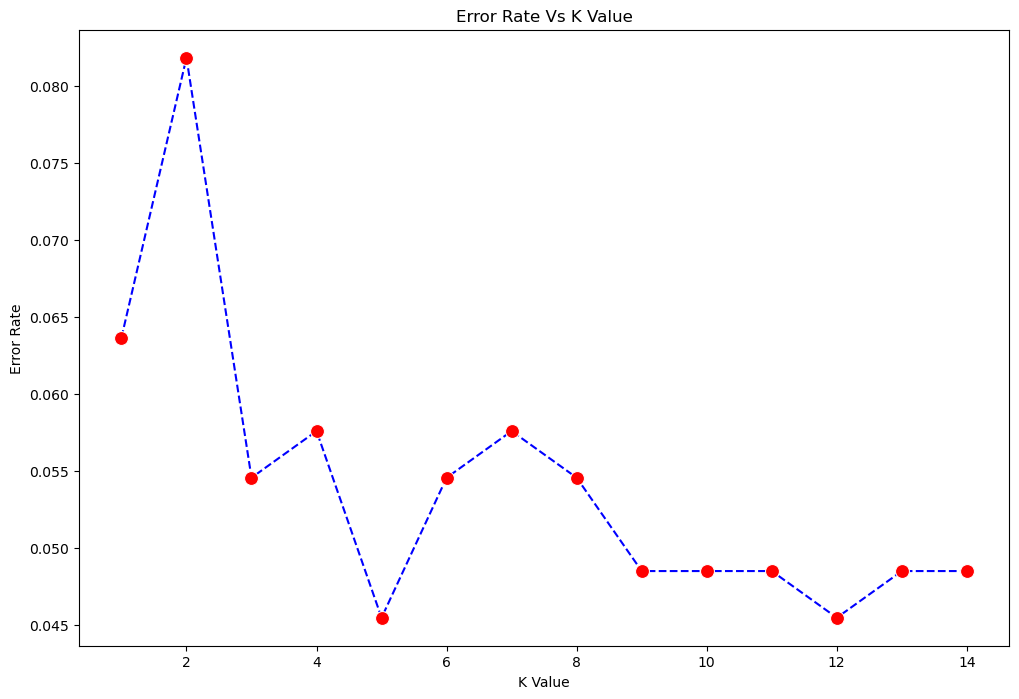

In [33]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.lineplot(x=range(1, 15), y=my_error_rate, color='blue', linestyle= 'dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_df, y_train)
predictions = knn.predict(X_test_scaled_df)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [31]:
print(confusion_matrix(y_test, predictions))
print()
print(accuracy_score(y_test, predictions))
print()
print(classification_report(y_test, predictions))

[[149   6]
 [  9 166]]

0.9545454545454546

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       155
           1       0.97      0.95      0.96       175

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

